# **Project Title : Fastag Fraud Detection**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('FastagFraudDetection.csv')
data

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [4]:
print(data.dtypes)

Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object


In [ ]:
num_rows, num_cols = data.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')

Number of rows: 5000
Number of columns: 13


##Distribution of Fraud Indicator

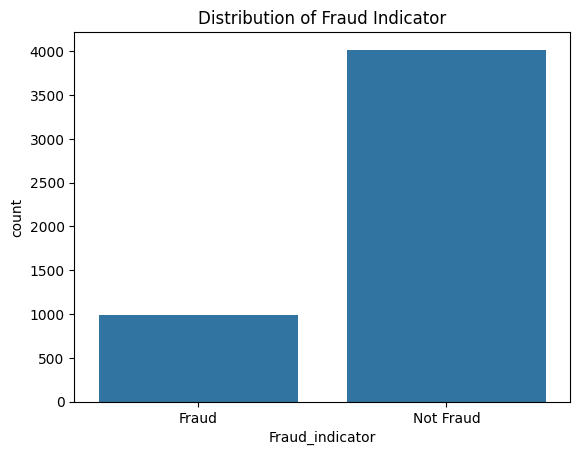

In [ ]:
sns.countplot(x='Fraud_indicator', data=data)
plt.title('Distribution of Fraud Indicator')
plt.show()

##Distribution of Fraud Indicator

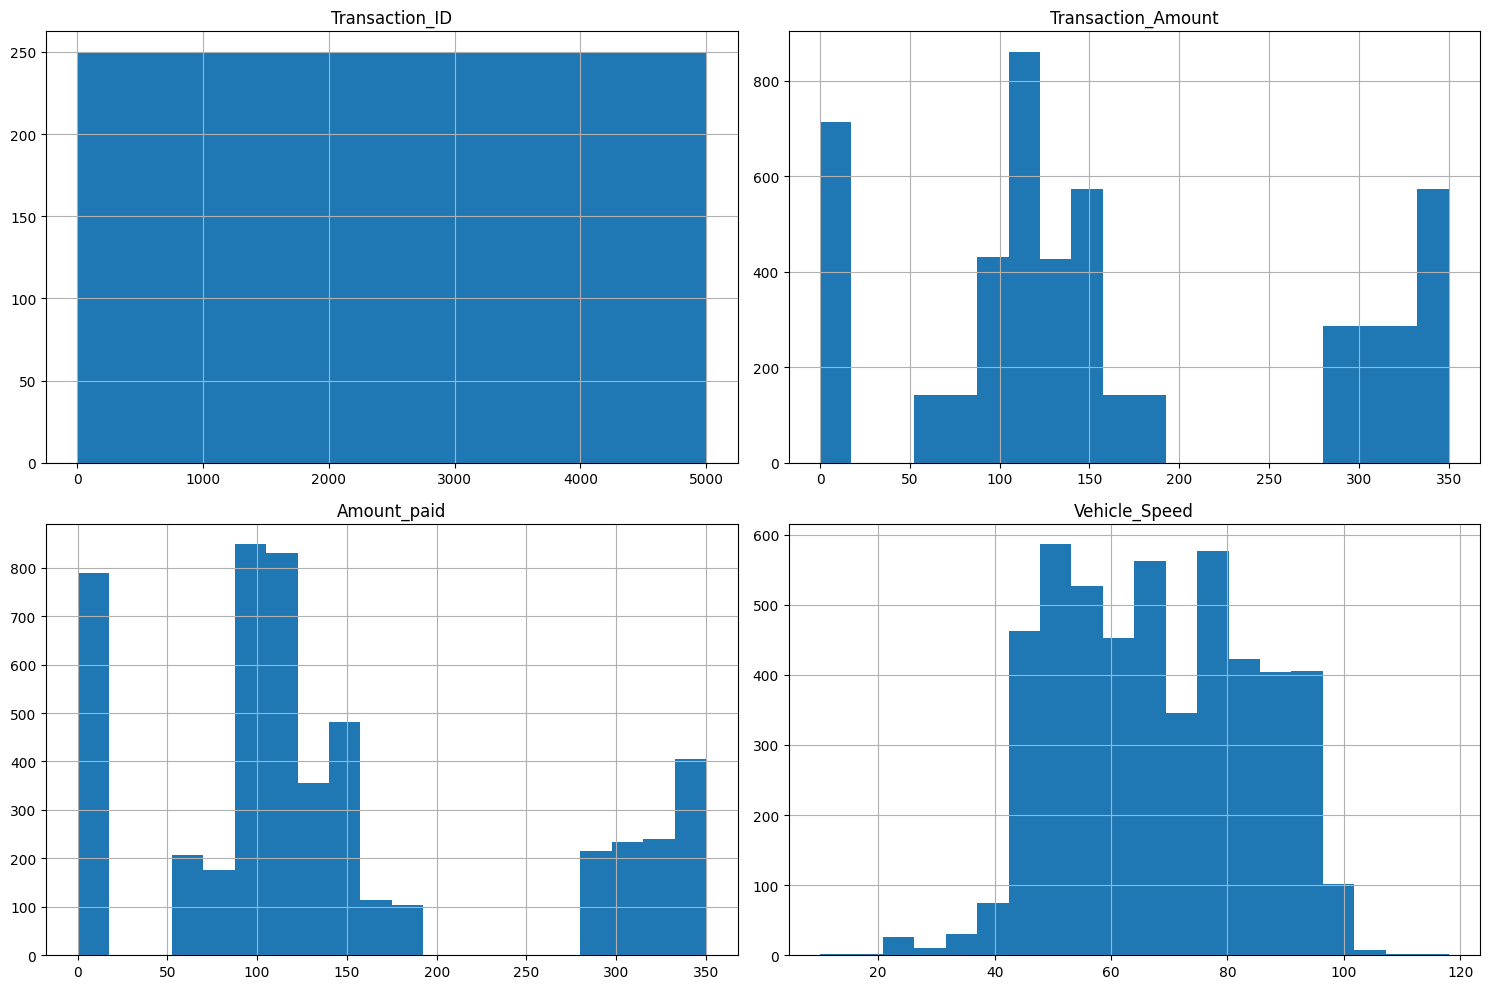

In [ ]:
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


##Drop the unwanted columns

In [ ]:
columns_to_drop = ['Transaction_ID', 'Timestamp', 'FastagID', 'Vehicle_Plate_Number','Vehicle_Type','FastagID','TollBoothID','Geographical_Location','Vehicle_Speed','Vehicle_Plate_Number']
data = data.drop(columns=columns_to_drop)

In [ ]:
data.to_csv('FastagFraudDetection.csv', index=False)

##Missing values

In [ ]:
data.isnull().sum()                #Number of missing values in each column

Lane_Type             0
Vehicle_Dimensions    0
Transaction_Amount    0
Amount_paid           0
Fraud_indicator       0
dtype: int64

In [ ]:
data.isnull().sum().sum()          #Number of missing values in the total data

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lane_Type           5000 non-null   object
 1   Vehicle_Dimensions  5000 non-null   object
 2   Transaction_Amount  5000 non-null   int64 
 3   Amount_paid         5000 non-null   int64 
 4   Fraud_indicator     5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


##Specific feature for Fraud detection

In [ ]:
data['Lane_Type'].unique()

array(['Express', 'Regular'], dtype=object)

In [ ]:
data['Vehicle_Dimensions'].unique()

array(['Large', 'Small', 'Medium'], dtype=object)

**Encoding the Fraud Indicator variable

In [ ]:
# Map the string values to integers
encoding_fraud_indicator = {'Fraud': 1, 'Not Fraud': 0}
data['Fraud_indicator'] = data['Fraud_indicator'].map(encoding_fraud_indicator)

In [ ]:
data.to_csv('FastagFraudDetection.csv', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lane_Type           5000 non-null   object
 1   Vehicle_Dimensions  5000 non-null   object
 2   Transaction_Amount  5000 non-null   int64 
 3   Amount_paid         5000 non-null   int64 
 4   Fraud_indicator     5000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 195.4+ KB


##Splitting X as feature variables and Y as Target variable

In [ ]:
X = data.drop('Fraud_indicator', axis=1)
Y = data['Fraud_indicator']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lane_Type           5000 non-null   object
 1   Vehicle_Dimensions  5000 non-null   object
 2   Transaction_Amount  5000 non-null   int64 
 3   Amount_paid         5000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 156.4+ KB


In [ ]:
rows_X, cols_X = X.shape
print(f'Number of rows: {rows_X}')
print(f'Number of columns: {cols_X}')

Number of rows: 5000
Number of columns: 4


##Encoding categorical features and Scaling numerical features

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_cols),
        ('scaler', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'  # Keep columns not specified in transformers
)

# Fit and transform X
X = preprocessor.fit_transform(X)

In [ ]:
print(X)

[[ 1.          0.          1.         ...  0.          1.68036444
  -0.1996894 ]
 [ 0.          1.          0.         ...  1.         -0.36519453
  -0.38753513]
 [ 0.          1.          0.         ...  1.         -1.43244269
  -1.32676377]
 ...
 [ 0.          1.          0.         ...  0.         -0.40966321
  -0.24665083]
 [ 1.          0.          1.         ...  0.         -0.14285117
   0.03511776]
 [ 0.          1.          1.         ...  0.          1.50248975
  -0.15272797]]


##Building,Training and Evaluating Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=0)

In [ ]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each classifier separately
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, Y_train)

    # Predict on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    conf_matrix = confusion_matrix(Y_test, y_pred)

    print(f'Classifier: {name}')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('Confusion Matrix:\n', conf_matrix)
    print('-' * 50)

Classifier: Logistic Regression
Accuracy: 0.96
Precision: 1.0
Recall: 0.7833935018050542
F1 Score: 0.8785425101214575
Confusion Matrix:
 [[1223    0]
 [  60  217]]
--------------------------------------------------
Classifier: Decision Tree
Accuracy: 0.9993333333333333
Precision: 1.0
Recall: 0.9963898916967509
F1 Score: 0.9981916817359855
Confusion Matrix:
 [[1223    0]
 [   1  276]]
--------------------------------------------------
Classifier: Support Vector Machine
Accuracy: 0.9746666666666667
Precision: 1.0
Recall: 0.8628158844765343
F1 Score: 0.9263565891472868
Confusion Matrix:
 [[1223    0]
 [  38  239]]
--------------------------------------------------
Classifier: Random Forest
Accuracy: 0.9993333333333333
Precision: 1.0
Recall: 0.9963898916967509
F1 Score: 0.9981916817359855
Confusion Matrix:
 [[1223    0]
 [   1  276]]
--------------------------------------------------
Classifier: Gradient Boosting
Accuracy: 0.9893333333333333
Precision: 1.0
Recall: 0.9422382671480144
F1 Sco

In [ ]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, Y_train)

# Evaluate the model
y_pred = random_forest_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

print('Decision Tree Evaluation Metrics:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:\n', conf_matrix)


Decision Tree Evaluation Metrics:
Accuracy: 0.9993333333333333
Precision: 1.0
Recall: 0.9963898916967509
F1 Score: 0.9981916817359855
Confusion Matrix:
 [[1223    0]
 [   1  276]]


# **Real-time Fraud Detection:**

In [ ]:
# Function to preprocess new input data
def preprocess_input(data):
    # Create a DataFrame from the input data
    df = pd.DataFrame([data], columns=['Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid'])

    # Apply the preprocessor
    processed_data = preprocessor.transform(df)

    return processed_data

In [ ]:
def predict_fraud(data):
    if data['Transaction_Amount'] != data['Amount_paid']:
        return '**Fraud** (Transaction Amount and Paid amount are different)'
    else:
        processed_data = preprocess_input(data)
        prediction = random_forest_classifier.predict(processed_data)
        if prediction[0] == 1:
            return '**Fraud** (Wrong Amount for vehicle of this dimension or for this lane type)'
        elif prediction[0] == 0:
            return 'Not Fraud'
        else:
            return 'errorproject'

In [ ]:
def get_user_input_and_predict():
    print("Enter the Fastag transaction details:")                              #Function to call the previous user input function to get the input and display if fraud or not fraud
    lane_type = input("Lane Type: Express/Regular : ")
    vehicle_dimensions = input("Vehicle Dimensions: Large/Small/Medium : ")
    transaction_amount = float(input("Transaction Amount:  "))
    amount_paid = float(input("Amount Paid: "))

    # Create a dictionary with the input data
    new_transaction = {

        'Lane_Type': lane_type,
        'Vehicle_Dimensions': vehicle_dimensions,
        'Transaction_Amount': transaction_amount,
        'Amount_paid': amount_paid,
      }

    # Predict and display the result
    result = predict_fraud(new_transaction)
    print('The transaction is:', result)

# Get user input and predict
get_user_input_and_predict()

Enter the Fastag transaction details:
Lane Type: Express/Regular : Express
Vehicle Dimensions: Large/Small/Medium : Large
Transaction Amount:  400
Amount Paid: 400
The transaction is: Not Fraud
